# Bernoulli, Binomial, Poisson, Geometric 

```{contents} Table of Contents
:depth: 3
```

## Introduction

Several probability distributions have been studied in depth. Templates like this allow us to model data generated from an experiment quickly. Random variable templates are so useful that several programming languages have optimized how to compute probabilities, expected values, and higher moments.

We will study parametric distributions for random variables. A set of **parameters**---constants---determine how our random variable assigns probabilities to outcomes.

## Discrete Distributions

### The Bernoulli Distribution

The Bernoulli distribution assigns probabilities to a random variable whose support contains the values 0 and 1. 
The Bernoulli distribution has a single parameter, often denoted $\theta$, that controls how probabilities are assigned to these two values, 0 and 1.

To communicate that a random variable $Z$ has a Bernoulli distribution with parameter $\theta$, we write:

\begin{align}
    Z \sim \text{Bernoulli}(\theta)
\end{align}

The parameter $\theta$ can take any value between 0 and 1 inclusive, or $\theta \in [0,1]$.
The allowable values a set of parameters can take is called the **parameter space**.

The support of $Z$ is $\text{supp}(Z) = \{0,1\}$, and the probability mass function for the random variable $Z$ is:

\begin{align}
f_{Z}(z) =
    \begin{cases}
        \theta, & \text{if } z=1 \\
        1- \theta, & \text{if } z=0
    \end{cases}
\end{align}

We can use the probability mass function to compute the expectation:

\begin{align}
\mathbb{E}(Z) &= f_{Z}(1) \cdot 1 + f_{Z}(0) \cdot 0 \\
              &= f_{Z}(1) \cdot 1 = f_{Z}(1) \\
              &= \theta
\end{align}

And we can use the probability mass function to compute the variance:

\begin{align}
V(Z) &= (1 - \theta)^{2} f_{Z}(1) + (0-\theta)^{2} f_{Z}(0) \\
     &= (1 - \theta)^{2} \theta + \theta^{2} (1-\theta) \\
     &= \theta(1-\theta) \left[ (1-\theta) + \theta  \right] \\
     &= \theta(1-\theta)
\end{align}


**Example**: Define $Z \sim \text{Bernoulli(0.45)}$.
Then:

\begin{align}
    \text{supp}(Z) &= \{0,1\} \\
    P(Z=0) &= 0.55 \\
    P(Z=1) &= 0.45 \\
    \mathbb{E}(Z) &= 0.45 \\
    V(Z) &= 0.45(0.55) = 0.25
\end{align}

**Example**: A clinical trial enrolls patients and follows them for one year. The clinical team wants to understand the proportion of patients that experience or do not experience an adverse event. We could model whether each patient either experiences or does not experience an adverse event using a Bernoulli distribution. Define $Z_{i}$ as a Bernoulli-distributed random variable for the $i^\text{th}$ patient in the study. When $Z_{i} = 1$, the $i^{\text{th}} $ patient experienced an adverse event; otherwise, $Z_{i} = 0$.


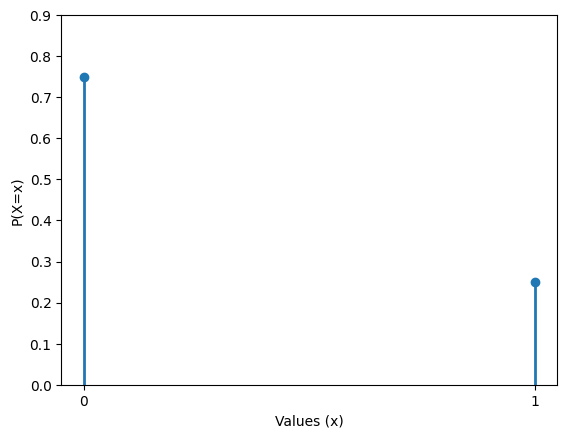

In [42]:
from scipy import stats 

p=1./4

support = np.arange(0,1+1,1)
pmf     = stats.binom(1,p).pmf(support)

plt.vlines(support, len(pmf)*[0] , pmf, lw=2)
plt.scatter(support,  pmf)

plt.xlabel("Values (x)")
plt.ylabel("P(X=x)")

plt.ylim(0,0.90)
plt.xticks([0,1])

plt.show()

### The Binomial distribution

A random variable $X$ distributed Binomial$(N,\theta)$ has as support $supp(X) = \{0,1,2,3,4,5,\cdots,N\}$, and the probability mass function is 

\begin{align}
    f_{X}(x) = \binom{N}{x} \theta^{x}(1-\theta)^{N-x}
\end{align}
where $\binom{N}{x}$ is called a binomial coefficient and is defined as $\binom{N}{x} = \frac{N!}{x!(N-x)!}$.
The binomial coefficient is often read "N choose x" and counts the number of ways one can choose $x$ items from a set of $N$ items where the order that the $x$ items is chosen does not matter. For example, $\binom{10}{4}$ counts the number of ways to choose 4 items from a set of 10 items where the order we selected each of the four items does not matter.

The expected value and variance of $X$ are 
\begin{align}
    \mathbb{E}(X) &= N\theta \\ 
             V(X) &= N\theta(1-\theta)
\end{align}

Given N observations, the binomial distribution assigns probabilities to the number of observations that experience an outcome of interest where we assume that the probability any single observation experiences the event is $\theta$. 

**Example** Imagine we randomize 200 patients in a clinical trial where 100 are enrolled to receive a novel treatment and 100 are enrolled to receive a control treatment. In the treatment group, 10 patients experience an adverse event from the treatment and in the control group 15 patients experience an adverse event. In previous work we found that the probability any one patient experiences an adverse event in the treatment group is 0.02 and in the control group is 0.04. We can define a random variable $T \sim \text{Bin}(100,0.02)$ that assigns a probability to the number of patients who experience an adverse event and define a random variable $C \sim \text{Bin}(100,0.04)$ that assigns probabilities to the number of patients who experience an event in the control group.     

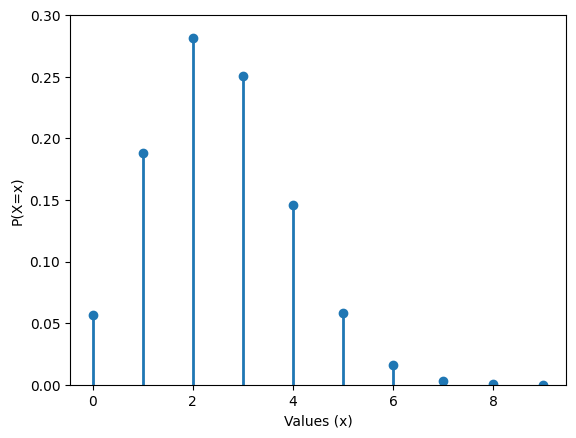

In [43]:
from scipy import stats 

p=1./4
N=10
support = np.arange(0,10,1)
pmf     = stats.binom(N,p).pmf(support)

plt.vlines(support, len(pmf)*[0] , pmf, lw=2)
plt.scatter(support,  pmf)

plt.xlabel("Values (x)")
plt.ylabel("P(X=x)")

plt.ylim(0,0.30)

plt.show()

#### Relationship between Bernoulli and Binomial distribution 

Define the random variable $X_{i} \sim \text{Bernoulli}(\theta)$
Then the random variable $Y = \sum_{i=1}^{N} \sim \text{Binomial}(N,\theta)$.

Intuitively, we can think of assigning a probability to $x$ successes and $N-x$ failures from a Binomial distribution as equivalent to the probability of finding $x$ 1s and $N-x$ 0s from $N$ Bernoulli distributions. 

Lets look at how we would show that the sum of two Bernoulli distributions equals a $\text{Bin}(2,\theta)$ distribution and then generalize. 

Let $Y = X_{1} + X_{2}$.
Then the support of $Y$ is either 0, 1, or 2. 

The probability mass function for $Y$ can be broken up into three cases 
By considering the sample space $\mathcal{G} = \text{supp}(X_{1}) \times \text{supp}(X_{2}) = \{ (0,0),(1,0),(0,1),(1,1) \}$.

The sum of two Bernoulli random variables can only equal zero if both random variables take the value zero. In other words, only the element $(0,0) \in \mathcal{G}$

\begin{align}
    f_{Y}(0) = P(Y=0) &= P(X_{1} + X_{2} = 0) \\ 
    &= P(X_{1}=0) \times P(X_{2}=0) = (1-\theta)^{2}\\
    &= \binom{2}{0} \theta^{0} (1-\theta)^{2-0}
\end{align}

The sum of two Bernoulli random variables can only equal two if both random variables take the value zero. In other words, only the element $(1,1) \in \mathcal{G}$

\begin{align}
    f_{Y}(2) = P(Y=2) &= P(X_{1} + X_{2} = 2) \\ 
    &= P(X_{1}=1) \times P(X_{2}=1) = \theta^{2}\\
    &= \binom{2}{2} \theta^{2} (1-\theta)^{2-2}
\end{align}

The sum of two Bernoulli random variables can equal one if either the first ranomd variables equals one and the second zero, or vice-versa.
In other words, the set of elements $\{ (1,0), (0,1)\} \subset \in \mathcal{G}$

\begin{align}
    f_{Y}(1) = P(Y=1) &= P(X_{1} + X_{2} = 1) \\ 
    &= P(X_{1}=1) \times P(X_{2}=0) + P(X_{1}=0) \times P(X_{2}=1) \\ 
    &= \theta (1-\theta) + (1-\theta) \theta \\
    &= 2\theta(1-\theta)\\
    &= \binom{2}{1} \theta^{1}(1-\theta)^{2-1}
\end{align}

### The Poisson distribution

If a random variable $X$ has a Poisson distribution then the support of $X$ is all non-negative integers or $supp(X) = \{0,1,2,3,4,...\}$, and the probability mass function is 

\begin{align}
    f_{X}(x) = \frac{e^{-\lambda} \lambda^{x}}{x!}
\end{align}
where $x!$ is read "x factorial" and is defined as 
\begin{equation}
    x!=x (x-1) (x-2) (x-3) \cdots (2) (1)
\end{equation}
For example, $5! = (5)(4)(3)(2)(1) = 60$.
The parameter space for the single parameter $\lambda$ is all positive real numbers or $\lambda \in (0,\infty)$. 

The expected value and variance are
\begin{align}
    \mathbb{E}(X) &= \lambda \\ 
             V(X) &= \lambda 
\end{align}

A random variable that follows a Poisson distribution often corresponds to an experiment where the quantity of interest is a rate. A Poisson random variable assigns probabilities to the number of occurrences of an event in a given time period. 

**Example** The owner of a cafe wants records the number of espressos they produce each day and wants to characterize the probability they produce 0, 1, 2, etc. espressos. For one month the owner records the number of espressos produced per day and find on average that they produce 25 per day. We can model the number of espressos per day as a random variable $X \sim Pois(25)$.



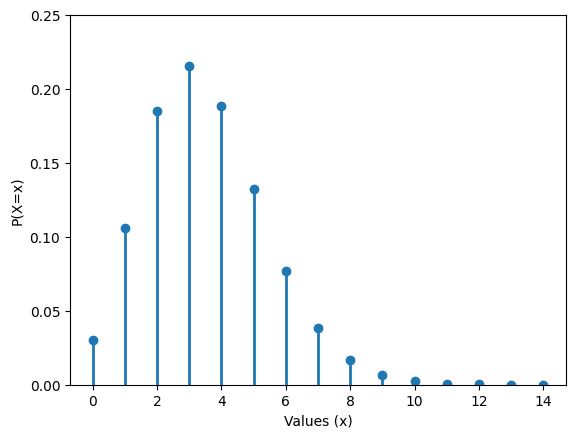

In [44]:
from scipy import stats 

lamb = 3.5
support = np.arange(0,15,1)
pmf     = stats.poisson(lamb).pmf(support)

plt.vlines(support, len(pmf)*[0] , pmf, lw=2)
plt.scatter(support,  pmf)

plt.xlabel("Values (x)")
plt.ylabel("P(X=x)")

plt.ylim(0,0.25)

plt.show()

#### Relationship between Binomial and Poisson distribution 

Define an interval of time from 0 to $\tau$ and suppose you wish to count the number of times some event occurs in this time interval. 
Divide the time interval $[0,\tau]$ into $\delta t$ equally spaced pieces. 
Then there are $N = \frac{\tau}{\delta t}$ pieces from 0 to $\tau$.

Define a Binomial random variable $Y \sim \text{Binomial}(N,\lambda \delta t) $
Then we can write down the probability mass function, pull apart each term, and reform the pmf to look similar to the pmf for a poisson distribution. 

First we write down the pmf for $Y$. 

\begin{align}
    f_{Y}(y) = \binom{N}{y} (\lambda \delta t)^{y} ( 1 - \lambda \delta t )^{N-y} \\
\end{align}

Next, lets expand the binomial coefficient
\begin{align}
    f_{Y}(y) = \frac{N!}{y! (N-y)!} (\lambda \delta t)^{y} ( 1 - \lambda \delta t )^{N-y}\\
\end{align}

We know that the poisson pmf has the term $(\lambda)^{y}/y!$.
Lets re-write our above pmf to look close to this term. 

\begin{align}
    f_{Y}(y) = \frac{N!}{(N-y)!} \frac{(\lambda \delta t)^{y}}{y^{!}}( 1 - \lambda \delta t )^{N-y}\\
\end{align}

At some point we will ask what happens to this pmf as $\delta t$ shrinks towards zero. 
When $\delta t$ shrinks towards zero we know that the number of pieces our interval is divided into will grow towards infinity.
In other words $\delta t \to 0 \implies N \to \infty$.

Lets try to isolate out terms with $N$ or with $\delta t$. 
First we focus on the $(1-\lambda \delta t)$ term. 

\begin{align}
    f_{Y}(y) = \frac{N!}{(N-y)!} \frac{ (\lambda \delta t)^{y}}{y!}( 1 - \lambda \delta t )^{N} ( 1 - \lambda \delta t )^{-y}\\
\end{align}

Lets look at the term 
\begin{align}
    (\lambda \delta t)^{y}
\end{align}

Because $N = \frac{\tau}{\delta t}$ we know that $\delta t = \frac{\tau}{N}$.
\begin{align}
    (\lambda \delta t)^{y} &= \left(\lambda \frac{\tau}{N}\right)^{y} = (\lambda \tau )^{y} \left(\frac{1}{N}\right)^{y}
\end{align}

\begin{align}
    f_{Y}(y) = \frac{N!}{(N-y)!} \left( \frac{1}{N}\right)^{y} \frac{ (\lambda \tau)^{y}}{y!}( 1 - \lambda \delta t )^{N} ( 1 - \lambda \delta t )^{-y}\\
\end{align}

We can also work on this term $( 1 - \lambda \delta t )^{N}$ and see that 

\begin{align}
    \left( 1 - \lambda \delta t \right)^{N} = \left( 1 - \frac{\lambda \tau}{N} \right)^{N}.
\end{align}

Lets plug this in 

\begin{align}
    f_{Y}(y) = \frac{N!}{(N-y)!} \left( \frac{1}{N}\right)^{y} \times \frac{ (\lambda \tau)^{y}}{y!} \times \left( 1 - \frac{\lambda \tau}{N} \right)^{N} \times( 1 - \lambda \delta t )^{-y}\\
\end{align}

Now let $\delta t$ approach zero. 
This means that the number of pieces $N$ from 0 to $\tau$ will increase towards infinity. 

Then the term 
\begin{align}
    \lim _{N \to \infty}\frac{N!}{(N-x)!} \frac{1}{N^{x}} = 1 
\end{align}

Not much can be done for the term 

\begin{align}
    \frac{(\lambda \tau)^{y}}{y^{!}}
\end{align}

As the number of pieces goes towards infinity the size of these pieces $\delta t$ goes to zero and so 
\begin{align}
   \lim_{\delta t \to 0} ( 1 - \lambda \delta t )^{-y} = 1
\end{align}

The final term is 

\begin{align}
    \left( 1 - \frac{\lambda \tau}{N} \right)^{N}
\end{align}

and in the limit this approaches an exponential function (see the mathematical aside below if interested in why this limit approaches the exponential function). 

\begin{align}
    \lim_{N \to \infty} \left( 1 - \frac{\lambda \tau}{N} \right)^{N} = e^{-\lambda \tau }
\end{align}

This mean then that the probability mass function for $Y$ converges to the function 

\begin{align}
    f_{Y}(y) \to \frac{ (\lambda \tau)^{y}}{y!} e^{-\lambda \tau}
\end{align}

In other words, the distribution of the random variable $Y$ converges to a **Poisson** distribution with parameter $\lambda \tau$. 

Lets look at an example where we may start with a Binomial distribution but instead decide that the Poisson distribution, while an approximation, is good enough. 

**Example** 
Suppose we wish to study the number of infections per month for a seasonal infectious agent during the "off-season". 
From lab reports we find that there are 1000 individuals who are susceptible to infection. 
We find further that the probability of infection is a constant $0.05$ per week and it is likely that $20$ individuals are currently infected. 

We decide to model this as a Binomial distribution with $N=980$ and probability $p=0.05$. 
Then our probability mass function looks like 


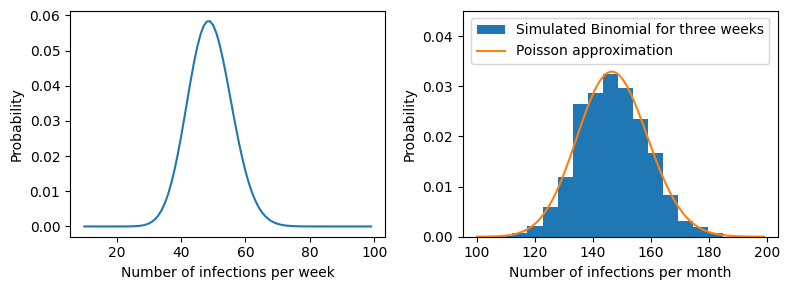

In [45]:
from scipy import stats 
import numpy as np 

fig, axs = plt.subplots(1,2, figsize=(8,3))

ax = axs[0]

#--first we will display the pmf for the Binomial corresponding to infections per week 
support = np.arange(10,100)
Y       = stats.binom( n=980, p = 0.05 ) 
ax.plot(support, Y.pmf(support))
ax.set_ylabel("Probability")
ax.set_xlabel("Number of infections per week")

#--simulation of three binomial distributions added up. 
#--In other words, the total number of infections per month. 
infect_per_month = []
for nsim in range(2000):
    threeweeks = np.random.binomial(980,0.05,size=3)
    threeweeks = sum(threeweeks)
    infect_per_month.append(threeweeks)

ax = axs[1]
ax.hist(infect_per_month, 15, density=True, label="Simulated Binomial for three weeks")

#--Then we will display the pmf for the Poisson corresponding to infections per week ( 980 times 0.05 per week times three weeks )

support = np.arange(100,200)
Z = stats.poisson( 980*0.05*(3./1) )

ax.plot(support, Z.pmf(support), label="Poisson approximation")
ax.set_ylabel("Probability")
ax.set_xlabel("Number of infections per month")

ax.set_ylim(0,0.045)

ax.legend(loc="upper center")

fig.set_tight_layout(True)

---

**Mathematical aside**

The goal of our mathematical aside is to show that $ \lim_{N \to \infty} (1+\frac{x}{N})^{N} = e^{x}$.
If we can show that then we can see that 

\begin{align}
     \lim_{N \to \infty} \left( 1 - \frac{\lambda \tau}{N} \right)^{N} =  \left( 1 + \frac{-\lambda \tau}{N} \right)^{N} = e^{-\lambda \tau}
\end{align}

One approach is to evaluate the above sequence 

\begin{align}
    a_{N} = \left(1+\frac{x}{N}\right)^{N}
\end{align}

for the first couple of values and observe a pattern. 
For $N=2$, we find 

\begin{align}
    \left(1+\frac{x}{2}\right)^{2} &= 1^{2} + \left(\frac{x}{2} \right)^{2} + 2 (1)\frac{x}{2}\\
                        &= \binom{2}{0} 1^{2} + \binom{2}{2} \left(\frac{x}{2} \right)^{2} + \binom{2}{1} (1) \frac{x}{2}\\
\end{align}

The above formula is called the Binomial expansion. 
The Binomial expansion says 

\begin{align}
    (x + y)^{n} = \sum_{k=0}^{n} \binom{n}{k} x^{k}y^{n-k}
\end{align}

We can apply this rule for our problem. 
Our "$y$" is the value $1$ and our "$x$" is the value $\frac{x}{N}$. 

\begin{align}
    \left(1+\frac{x}{N}\right)^{N} &= \sum_{k=1}^{N} \binom{N}{k} 1^{N-k}\left(\frac{x}{N}\right)^{N} = \sum_{k=0}^{N} \binom{N}{k} \left(\frac{x}{N}\right)^{N}  \\ 
\end{align}

Lets see if we can make sense of the first few terms and find a pattern. 

\begin{align}
    & = \binom{n}{0} \left(\frac{x}{N}\right)^{0} + \binom{N}{1} \frac{x}{N}  + \binom{N}{2} \left(\frac{x^{2}}{N^{2}}\right) + .. \\ 
    & =  1 + 1 + \left( \frac{x^{2}}{2!} \right)  \frac{N(N-1) }{N^{2}} + \left( \frac{x^{3}}{3!} \right) \frac{N(N-1)(N-2) }{N^{3}} + \cdots \\ 
    & =  1 + 1 + \left( \frac{x^{2}}{2!} \right) \left(1-\frac{1}{N} \right) + \left( \frac{x^{3}}{3!} \right) \left(1-\frac{1}{N} \right)\left(1-\frac{2}{N} \right) + \cdots \\ 
\end{align}

It looks like we will end up with terms like $\frac{x^{n}}{n!}$ and then a product of terms like 
$ (1-1/N)(1-2/N)(1-3/N)$ etc.
Because each of these terms goes to one as $N$ goes to infinity their product will go to one too. 
Then we're left with 

\begin{align}
    2 + \sum_{j=2}^{n} \frac{x^{N}}{N!} = \sum_{j=0}^{N} \frac{x^{N}}{N!}
\end{align}

This is the series expansion for $e^{x}$. In other words 
\begin{align}
    \lim_{N \to \infty} \left( 1 + \frac{x}{N} \right)^{N} = e^{x}
\end{align}

---

#### Relationship between Bernoulli and Poisson distribution 

Again, suppose we ask to compute the probability that a specific number of event occurs in an interval $[0,\tau]$.
We may decide to model the number of events that occur in this interval using a Poisson random variable. 
For example, we can define a random variable $X \sim \text{Pois}( \lambda \tau )$.
Where $\lambda$ is a rate (number of occurrences divided by time) and $\tau$ is a time interval. 

The pmf for $X$ is 

\begin{align}
    f_{X}(x)= e^{-\lambda \tau} \frac{(\lambda \tau)^{x}}{x!}
\end{align}

and the probability of no occurrences is 

\begin{align}
    f_{X}(0) &= e^{-\lambda \tau} \frac{(\lambda \tau)^{0}}{0!} \\ 
             &= e^{-\lambda \tau}
\end{align}

and the probability of a single occurrence in this interval is 

\begin{align}
    f_{X}(1) &= e^{-\lambda \tau} (\lambda \tau) \\ 
\end{align}

Again, partition this interval from 0 to $\tau$ into small pieces of length $\delta t$. 
Then the number of occurrences in the interval of length $\delta t$ is 

\begin{align}
    f_{Y_{1}}(y)= e^{-\lambda \delta t} \frac{(\lambda \delta t)^{y}}{y!}
\end{align}

where the random variable $Y_{1}$ is the random variable corresponding to the first interval $[0,\delta t]$. 
But if we assume that $\delta t$ is very small, we can approximate the probability assigned to zero occurrences and one occurrence.
We will see that this approximation lends itself to defining a new random variable that is distributed Bernoulli. 

\begin{align}
    f_{Y_{1}}(0) &= e^{-\lambda \delta t} \\ 
    f_{Y_{1}}(1) &= e^{-\lambda \delta t} (\lambda \delta t) \\ 
\end{align}

We know that the exponential function has a series representation 

\begin{align}
    e^{-\lambda \tau} = \sum_{k=0}^{\infty} \frac{(-\lambda \delta t)^{k}}{k!} = 1 - \lambda \delta t  + \frac{( \lambda \delta t )^{2}}{2} + \cdots
\end{align}

However, if $\delta t$ is extremely small then $(\delta t)^{2}$ is so small it can be excluded. 
That is 

\begin{align}
    e^{-\lambda \tau} = \sum_{k=0}^{\infty} \frac{(-\lambda \delta t)^{k}}{k!} &= 1 - \lambda \delta t  + \frac{( \lambda \delta t )^{2}}{2} + \cdots \\ 
    & \approx 1-\lambda \delta t
\end{align}

Lets plug-in this approximation for our random variable $Y_{1}$. 

\begin{align}
    f_{Y_{1}}(0) &= e^{-\lambda \delta t} \approx 1-\lambda \delta t \\ 
    f_{Y_{1}}(1) &= e^{-\lambda \delta t} (\lambda \delta t) = (1-\lambda \delta t)(\lambda \delta t) \approx  \lambda \delta t \\ 
\end{align}

The probability of any occurrences beyond one is so small that is negligible as well. 
\begin{align}
    f_{Y_{1}}(2) &= e^{-\lambda \delta t} (\lambda \delta t)^{2} \approx 0
\end{align}

We can define a random variable $Z \sim \text{Bernoulli}( \lambda \delta t )$
that represents this approximation.
That is, if we cut the interval $[0,\tau]$ into $N$ pieces of length $\delta t$ then we can define $N$ Bernoulli random variables with parameter $\lambda \delta t$ and 
\begin{align}
    X     &= Y_{1} + Y_{2} + \cdots + Y_{N}\\ 
    X     &\sim \text{Pois}(\lambda \tau) \\ 
    Y_{j} &\sim \text{Bernoulli} (\lambda \delta t)
\end{align}







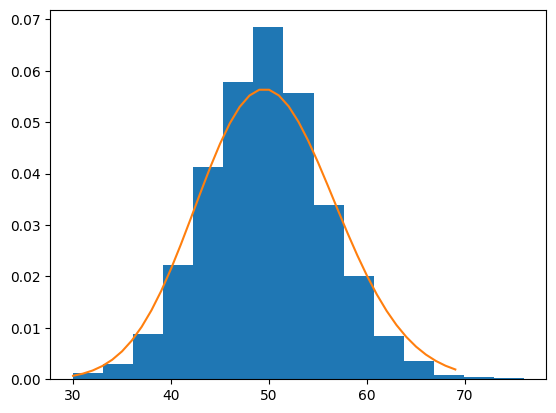

In [46]:
interval = (0,10)
interval = interval[1] - interval[0]
deltat   = 1./20 
rate = 5

bern_approx = []
for nsim in range(2000):
    s = 0 #<--Sum of bernoullis
    for _ in range( int(interval/deltat)  ):
        s = s+ np.random.binomial(1, deltat*(rate) )
    bern_approx.append(s)


plt.hist(bern_approx,15,density=True)
support = np.arange(30,70)
Y = stats.poisson( rate*interval)
plt.plot( support, Y.pmf(support) )


## Geometric random variable

A geometric random variable measures the number of trials until a "success", where success is a (purposely) abstract term. 
You could use a geometric random variable to assess the probability until a patient experiences a stroke or time until a factory light bulb burns out. 

The probability mass function for a random variable, $Y$, with a geometric distribution is 

\begin{align}
    f_{Y}(y) = (1-p)^{y} p. 
\end{align}

The support for this random variable is all non-negative integers $supp(Y) = \{0,1,2,3,4,5,\cdots\}$. 
The expected value and variance are 

\begin{align}
    \mathbb{E}(Y) &= \frac{1}{p} - 1 \\
    \mathbb{V}(Y) &= \frac{1}{p} \left(\frac{1-p}{p}\right)
\end{align}

**Example** Suppose we wish to measure the number of days until a patient enrolled in a clinical trial experience an adverse event.
From previous data, we estimate that one any day the probability a patient experiences an adverse event is 0.20. 
Then the probability assigned to the number of days until an adverse event can be represented by 

\begin{align}
    Y &\sim \text{Geom}(0.20)\\
    P(Y=y) &= (1-p)^{y}p
\end{align}

and we would expect that $\frac{1}{0.20}=5$ days will pass until an adverse event. 

Instead of measuring the number of trials until success.
You could measure on which trial a success occurs.
This too has a geometric distribution

\begin{align}
    supp(Y) = \{1,2,3,4,5,\cdots\}\\
    f_{Y}(y) = (1-p)^{y-1} p. 
\end{align}

\begin{align}
    \mathbb{E}(Y) &= \frac{1}{p}\\
    \mathbb{V}(Y) &= \frac{1}{p} \left(\frac{1-p}{p}\right)
\end{align}




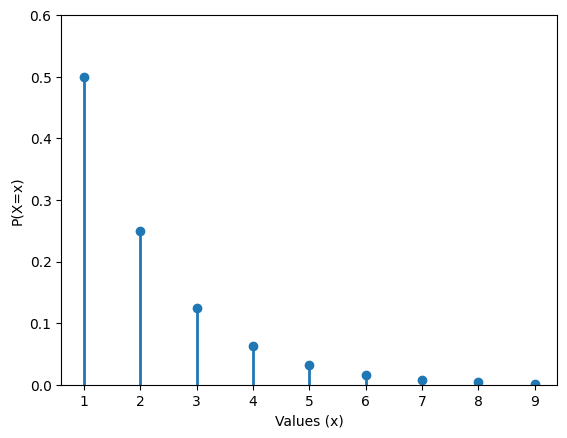

In [47]:
from scipy import stats 

p = 1./2
support = np.arange(1,10,1)
pmf     = stats.geom(1./2).pmf(support)

plt.vlines(support, len(pmf)*[0] , pmf, lw=2)
plt.scatter(support,  pmf)

plt.xlabel("Values (x)")
plt.ylabel("P(X=x)")

plt.ylim(0,0.6)

plt.show()

## Exponential random variable

A Exponential random variable measures time until a "success" just like a gemoetric random variable.
However, the exponential a random variable with the exponential distribution is defined over the continuum from zero to infinity $[0,\infty)$

Like the geometric, you could use an exponential random variable to assess the probability until a patient experiences a stroke or time until a factory light bulb burns out. 

The probability density function for a random variable, $Y$, with a exponential distribution is 

\begin{align}
    f_{Y}(y) = \lambda e^{-\lambda}. 
\end{align}

The support for this random variable is $supp(Y) = [0,\infty)$. 
The expected value and variance are 

\begin{align}
    \mathbb{E}(Y) &= \frac{1}{\lambda}\\
    \mathbb{V}(Y) &= \left(\frac{1}{\lambda}\right) \left(\frac{1}{\lambda}\right)
\end{align}

The parameter $\lambda \in [0,\infty]$ is the rate at which events occur, similar to the rate that was discussed above for the Poisson random variable. 

An important property of the exponential density is the **memoryless** property. 
A random variable, X, is **memoryless** if 

\begin{align}
    P(X > s + t | X > s) = P(X > t)
\end{align}

In other words, for the exponential distribution, the time until the next event does not depend on any previously elapsed times. 

For example, suppose we tracked patients until infection with a pathogen.
We model the time until infection as $X \sim \text{Exp}(1/5)$. 
Then the probability that a patient is infected within 4 days equals 

\begin{align}
    P(X \le 4; \lambda = 1/5) = \int_{0}^{5} \left(\frac{1}{5}\right) e^{-\frac{1}{5} 4  } \; dx
\end{align}

However, if we have a followed a patient for 10 days and ask "whats the probability that they are infected within 14 days?" the answer is the same.

\begin{align}
    P(X \le 4; \lambda = 1/5) = \int_{0}^{5} \left(\frac{1}{5}\right) e^{-\frac{1}{5} 4  } \; dx
\end{align}

The fact that we followed the patient for ten days is immaterial. This is an illustration of the memoryless property. 


**Example** Suppose patients undergo a minor elective surgery and we wish to characterize the time until discharge from the hospital.
We can characterize discharge times with a random variable $H \sim \text{Exp}(\lambda)$
From hospital records we estimate that hospital discharges $\lambda=3$ patienter per day. 
Then we can expect that the average number of days spent at the hospital is 

\begin{align}
    H &\sim \text{Exp}(3)\\
    \mathbb{E}(H) &= \frac{1}{3} \approx 0.33 
\end{align}

approximately 0.33 days or $ 0.33 \text{ days} \times \frac{24 \text{hours}}{1 \text{day}}$ = 7.9 hours. 


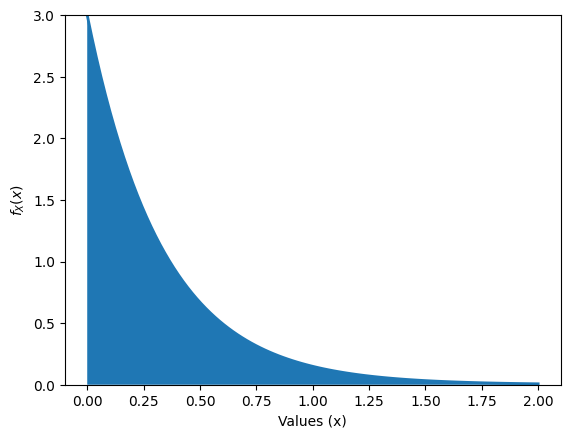

In [48]:
from scipy import stats 

support = np.linspace(0,2,100)
pdf     = stats.expon(scale=1./3).pdf(support)

plt.plot(support,  pdf, lw=2)
plt.fill_between(support, [0]*len(pdf), pdf)

plt.xlabel("Values (x)")
plt.ylabel("$f_{X}(x)$")

plt.ylim(0,3)
plt.show()

#### Relationship between Geometric and Exponential distribution 

Suppose we wish to define a **continuous** random variable with support $[0,\infty)$ that has similar properties to a random variable with the geometric density. 
That is, we assume that there exists a random variable with probability density $f_{X}(x)$ such that values in the support represent times until a specific event of interest. 
Instead of a probability that an event occurs at any given trial we assume that the probability assigned to when an event occurs follows a rate $\lambda$. 

A reasonable place to begin would be ask "can i assign a probability to an event taking place before time $\tau$" (and after time zero) using a geometric random variable?

One thought would be to partition the interval $[0,\tau]$ into pieces of length $\delta x$,  denote a geometric random variable $X$, and assess the probability that $X$ equals a value corresponding to $\tau$.

Below is an example of splitting the interval into 10 pieces of length $\delta x = \tau/10$.

0 [----------|----------|----------|----------|----------|----------|----------|----------|----------|----------] $\tau$

In other words, if we choose an interval of length $\delta x$ then we partition our interval into $\tau/\delta x$ pieces. 
The next approximation we need is the relationship we found between the Poisson and Bernoulli. 
If we are given a rate $\lambda$ then we know, that for a small interval $\delta x$, the product $\lambda \delta x$ is equal to a probability. 

Lets build our random variable

\begin{align}
    X &\sim \text{Geom}(\lambda \delta x) \\ 
    p( X = \tau/\delta x  ) & = (1-\lambda \delta x)^{\tau/\delta x} \lambda \delta x \\ 
        f_{X}(x) \delta x         & \approx (1-\lambda \delta x)^{\tau/\delta x} \lambda \delta x  \;\;\; \text{(Density is similar to prob for a small interval)}
\end{align}

For a sufficiently small choice $\delta x$ we find that our density is 

\begin{align}
        f_{X}(x) & = e^{-\lambda x} \lambda  \\
\end{align}

given that $\lim_{\delta x \to 0} (1-\lambda \delta x)^{\tau/\delta x} = e^{-\lambda x}$.
This is the probability density function for the Geometric random variable described above. 
In some sense, the exponential is a the continuous equivalent of the geometric density.

## Homework 

1. Let $X \sim \text{Bernoulli}(0.2)$
    1. P(X=0) = ?
    2. P(X=1) = ?
    3. Please compute $\mathbb{E}(X)$
    4. Please compute $V(X)$
    5. Define the $supp(X)$
    
2. Let $Y \sim \text{Bernoulli}(\theta)$, and show that $P(Y=1) = \mathbb{E}(Y)$
3. Let $Y \sim \text{Bernoulli}(\theta)$, and show that $V(Y) \leq \mathbb{E}(Y)$ 
4. Let $Y \sim \text{Bernoulli}(\theta)$, and let $Z$ be the following function of $Y$:

    \begin{align}
        Z(y) = \begin{cases}
                1 & \text{ if } y = 0\\
                0 & \text{ if } y = 1
            \end{cases}
    \end{align}


   What probability distribution does $Z$ follow and why?

5. A new vaccine for a contagious disease is tested, and the probability that a vaccinated person does not get infected upon exposure is **0.9**. If a person is vaccinated and exposed to the disease, what is the probability that they:  
   1. Get infected?  
   2. Do not get infected?

6. Design an experiment (short description) and define a random variable $Y$ that may follow a geometric distribution. In the context of your experiment, how would you communicate $\mathbb{E}(Y)$ to another without statistical expertise?

7. A rapid test for a certain virus correctly identifies an infected patient **95% of the time** (sensitivity) and correctly identifies a non-infected patient **98% of the time** (specificity). If a patient is randomly tested, what is the probability that:  
   a) The test is positive given that the patient is infected?  
   b) The test is negative given that the patient is not infected?

8. Define a random variable $R$ with a binomial distribution $(R \sim \text{Bin}(10,0.2))$.
    1. Compute $\mathbb{E}(R)$
    2. Compute $V(R)$
    3. Describe to someone who may not have statistical expertise what $P(R=3)$ means? Be sure to include assumptions about the Binomial distribution and how the parameters $N,\theta$ relate to this probability.
    4. For what value of $\theta$ is $V(R)$ the highest? Why does this make sense intuitively?

9. In a town where **10%** of the population is susceptible to a new flu strain, **15 people** are randomly selected. Let **X** be the number of susceptible individuals in this group. Compute:  
   a) The probability that exactly **3** people are susceptible.  
   b) The probability that at most **2** people are susceptible.  
   c) The expected number of susceptible individuals.

10. A new medication causes mild side effects in **20%** of patients. If **8 patients** take the medication, what is the probability that:  
   a) Exactly **2** patients experience side effects?  
   b) More than **3** patients experience side effects?
    
11. Suppose $Y \sim \text{Pois}(2)$
    1. Compute $P(Y=2)$
    2. Compute $P(Y \leq 2)$
    3. Compute $P(Y > 2)$
    
12. $X \sim \mathcal{N}(\mu, \sigma^{2}) $
    1. Let $Y = X - \mu$. What is the distribution of $Y$?
    2. Let $Z = Y/\sigma$. What is the distribution of $Z$?
    3. Compute $P(Z = 0)$
    
13. Suppose we define a new random variable $W$ with support $supp(W) = [0,1]$ and probability density function 

    \begin{align}
        f_{W}(w) = 2w
    \end{align}

    1. Compute $P(W < 1/2) = \int_{0}^{1/2} f_{W}(w)\; dw$
    2. Compute $P(W < 1) = \int_{0}^{1} f_{W}(w)\; dw$
      
14. Let $X$ be a continuous random variable. Is $P(X \leq x) = P(X < x)$? Why or why not? 

15. The number of patients arriving at a hospital’s emergency room follows a Poisson distribution with an average of **5 arrivals per hour**.

    1. What is the probability that exactly **3** patients arrive in the next hour?  
    2. What is the probability that at least **6** patients arrive in the next hour?

16. A hospital sees an average of **2 cases per year** of a rare disease. Assuming a Poisson process, compute the probability that:
    1. No cases are reported in a given year.  
    2. At least one case is reported in a given year.
       
17. A clinic tests individuals for a disease where **10% of tests come back positive**. If patients are tested one at a time, what is the probability that:  
    1.  The first positive test occurs on the **3rd** test?  
    2. The first positive test occurs **before the 5th test**?

18. A new drug has a **5% probability** of causing a mild side effect in a patient. If patients are monitored one at a time, find:  
   a) The probability that the first patient experiencing a side effect is the **4th** patient tested.  
   b) The expected number of patients who will take the drug before the first side effect is observed.

19. A hospital receives **on average 3 critically ill patients per day** who require intensive care. Suppose ICU capacity is **4 beds**  patient arrivals follow a Poisson distribution.  
   a) What is the probability that the ICU will reach full capacity in a day?  
   b) What is the probability that at least one bed remains empty by the end of the day?

20. In a hospital ward, the arrival of **new flu cases** follows a **Poisson distribution** with an average rate of **5 cases per day** (i.e., $\lambda = 5 $ cases per day).
    1. Compute the probability that **exactly one new flu case** occurs in a given hour.
    2. Compute the probability that **no new flu cases** occur in a given hour.
    3. If the hospital has only **2 isolation beds left**, what is the probability that both beds remain empty after the next **12 hours**? Hint: Use the Binomial distribution---this will help.
21. The time between arrivals of patients to an emergency room follows an exponential distribution with an average arrival rate of 6 patients per hour.
    1. What is the probability that the next patient arrives within 5 minutes?
    2. What is the probability that the next patient arrives after 15 minutes?
    3. What is the expected time between arrivals?

22. For a continuous random variable, $X$, the median is the value $m$ such that $ \int_{\infty}^{m} f_{X}(x) \; dx = 0.50$.
    1. Please compute an expression for the median for $X$ if $X \sim \text{Exp}(\lambda)$
       
24. In a flu outbreak, the time until a susceptible person gets infected is exponentially distributed with rate $\lambda = 1/10$ per day.
    1. What is the probability that a person becomes infected within 3 days?
    3. What is the median time to infection?
    4. If a person hasn’t been infected for 10 days, what’s the probability they’ll last another 5 days uninfected?
25. Please follow the below steps to show that a exponentially distributed random variable $Y$ is memoryless.
    1. Write down the memoryless property $P( Y>s+t | Y>s )$ and show that $P( Y>s+t | Y>s ) = \frac{P(Y > s+t) }{ P(Y>s) }$
    2. For a given value $y$, compute an expression for $P(Y>y) = \int_{y}^{\infty} \lambda e^{-\lambda y} \; dy $
    3. Use the expression in (2) to show that $\frac{P(Y > s+t) }{ P(Y>s) } = P(Y>t)$
26. The time between ambulance dispatches in a city follows an exponential distribution with expected value equal to 10 minutes.
    1. What is the probability that the next ambulance dispatch occurs in less than 6 minutes?
    2. What is the probability the time between dispatches is more than 15 minutes?
    3. If 2 minutes have already passed, what’s the probability the dispatch will occur in the next 5 minutes?